In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dataset=pd.read_csv(r'D:/imdb.csv')

In [11]:
dataset.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate


In [8]:
#Q1 Mengklasifikasi jenis tayangan berdasarkan kategori type film atau series

In [13]:
Type = dataset[['Name', 'Type']] #Menampilkan kolom judul tayangan dan typenya
Type.head()

,Name,Type
0,No Time to Die,Film
1,The Guilty,Film
2,The Many Saints of Newark,Film
3,Venom: Let There Be Carnage,Film
4,Dune,Film


In [15]:
#Mengklasifikasi jenis tayangan berdasarkan typenya
group_type = dataset.groupby('Type').size()
group_type.head()

Type
Film      4446
Series    1732
dtype: int64

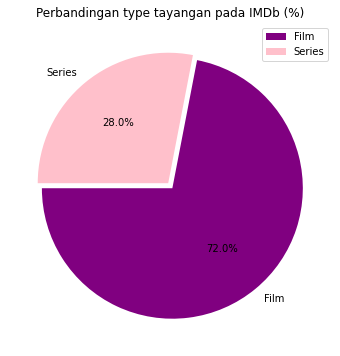

In [17]:
#Menampilkan data type tayangan pada pie chart
plt.figure(figsize=(12,6))
plt.title("Perbandingan type tayangan pada IMDb (%)")
grafik = plt.pie(dataset.Type.value_counts(), explode=(0.025,0.025), labels=dataset.Type.value_counts().index, colors=['purple','pink'], autopct='%1.1f%%', startangle=180)
plt.legend()
plt.show()

In [18]:
#Q2 Mengklasifikasi jenis tayangan dengan rating tidak kurang dari 8.0

In [20]:
Rating = dataset[['Name', 'Rate', 'Type']] #Menampilkan kolom judul tayangan, rating, dan typenya
Rating.head()

,Name,Rate,Type
0,No Time to Die,7.6,Film
1,The Guilty,6.3,Film
2,The Many Saints of Newark,6.4,Film
3,Venom: Let There Be Carnage,6.4,Film
4,Dune,8.3,Film


In [36]:
#Memfilter tayangan dengan rating tidak kurang dari 8.0
Rate = Rating[Rating.Rate!='No Rate']
Rates = Rate[Rate.Rate>='8.0']
Rates.head()

,Name,Rate,Type
4,Dune,8.3,Film
5,Ted Lasso,8.8,Series
9,Sex Education,8.3,Series
10,The Walking Dead,8.2,Series
13,The Sopranos,9.2,Series


In [37]:
#Mengklasifikasi jenis tayangan yang mempunyai rating tidak kurang dari 8.0 berdasarkan typenya
group_rate = Rates.groupby('Type').size()
group_rate.head()

Type
Film      353
Series    599
dtype: int64

In [38]:
#Q3 Menghitung banyaknya film atau series yang rilis setiap tahunnya

In [39]:
Tahun = dataset[['Name', 'Date']] #Menampilkan kolom judul tayangan dan tahun rilisnya
Tahun.head()

,Name,Date
0,No Time to Die,2021
1,The Guilty,2021
2,The Many Saints of Newark,2021
3,Venom: Let There Be Carnage,2021
4,Dune,2021


In [47]:
#Mengelompokkan jumlah tayangan setiap tahunnya sejak tahun 2011 sampai tayangan yang akan tayang di tahun 2022 dan 2023
Year = Tahun['Date'].value_counts().to_frame().reset_index().rename(columns={'index': 'Tahun','Date':'Jumlah'})
Year = Year[Year.Tahun>2010]
Year = Year.sort_values(by=['Tahun'], ascending=False)
Year

,Tahun,Jumlah
54,2023,14
16,2022,124
0,2021,736
2,2020,343
1,2019,360
3,2018,251
4,2017,220
5,2016,210
7,2015,195
6,2014,196


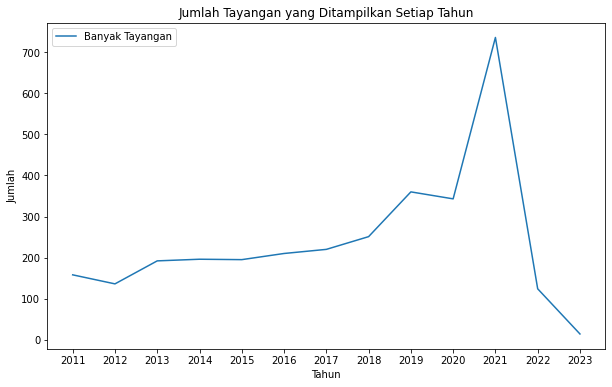

In [54]:
fig,ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=Year,x='Tahun',y='Jumlah')
ax.set_xticks(np.arange(2011,2024,1))
plt.title("Jumlah Tayangan yang Ditampilkan Setiap Tahun")
plt.legend(['Banyak Tayangan'])
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.show()